In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# read the data from the csv file created by the Data_Preprocessing notebook
data = pd.read_csv('data/raw_data_unscaled.csv', index_col=0, parse_dates=True)
data.dropna(inplace=True) #drop the rows where cum_stand = NaN
data.head()

,cl_kadij,cl_lobith,afv_lobith,stand_hvh,cum_stand
1982-02-12 00:00:00,118.0,109.000,3564.12,-19.0,68.0
1982-02-12 01:00:00,113.0,118.004,3559.79,-26.0,94.0
1982-02-12 02:00:00,113.0,118.137,3555.49,-12.0,137.0
1982-02-12 03:00:00,117.0,118.192,3551.20,14.0,190.0
1982-02-12 04:00:00,103.0,118.151,3546.91,52.0,250.0


In [3]:
#find a long time interval without gaps to do analysis
gaps = (data.index.values[1:] - data.index.values[:-1]) != np.timedelta64(1,'h')
gap_indices = np.where(gaps == True)[0]
gap_size = np.append(gap_indices,data.shape[0]) - np.insert(gap_indices,0,0)
max_gap_size = np.max(gap_size)
print('largest time interval with continuous data is of size', max_gap_size)
max_gap_index = gap_indices[np.argmax(gap_size) - 1] + 1
print('it is found at index ', max_gap_index)

correlation_data = data.iloc[max_gap_index:max_gap_index+max_gap_size]

#final check:
gaps = correlation_data.index.values[1:] - correlation_data.index.values[:-1] != np.timedelta64(1,'h')
if (np.sum(gaps) != 0):
    print('ERROR: something weird happened, there is still a gap in the continuous data found!')
    print(np.sum(gaps))
    print(np.where(gaps == True))

largest time interval with continuous data is of size 9718
it is found at index  48082


In [4]:
# define two functions to quickly calculate and visualize the correlation between two variables

def print_correlation(correlation, var1, var2):
    '''plots the given correlation vector and prints the position of the maximal correlation'''
    plt.title('Correlation of ' + str(var1) + ' and ' + str(var2) + ' over time')
    plt.plot(correlation);
    print('maximum correlation found at', np.argmax(correlation), 'hours')
    print('this is at', np.argmax(correlation)/24, 'days')
    print('minimum correlation (negative correlation) found at', np.argmin(correlation), 'hours')
    print('this is at', np.argmin(correlation)/24, 'days')

def get_correlation(data, var1, var2, num_steps):
    '''calculates the correlation for each offset in the interval [0,num_steps), 
       between the given variables var1 and var2 (both strings), 
       using the data in the dataframe "data" (in which var1 and var2 must be present)'''
    
    correlation = np.zeros(num_steps)
    for i in range(0,num_steps):
        var1_shifted = data.shift(-i)[var1][:data.shape[0] - num_steps]
        var2_data = data[var2][:data.shape[0] - num_steps]
        correlation[i] = np.corrcoef(var1_shifted, var2_data)[0,1]
    print_correlation(correlation,var1,var2)
    return correlation

maximum correlation found at 820 hours
this is at 34.1666666667 days
minimum correlation (negative correlation) found at 181 hours
this is at 7.54166666667 days


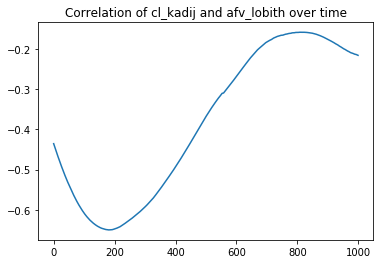

In [5]:
#calculate the correlation between cl_kadij and afv_lobith for 0 to 999 hour shift:
correlation_afv = get_correlation(correlation_data, 'cl_kadij', 'afv_lobith', 1000)

maximum correlation found at 101 hours
this is at 4.20833333333 days
minimum correlation (negative correlation) found at 855 hours
this is at 35.625 days


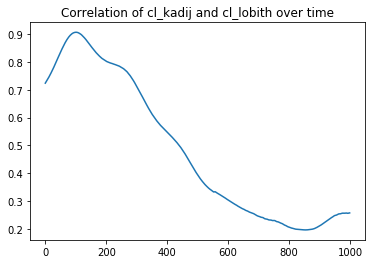

In [6]:
#calculate the correlation between cl_kadij and cl_lobith for 0 to 999 hour shift:
correlation_cl = get_correlation(correlation_data, 'cl_kadij', 'cl_lobith', 1000)

maximum correlation found at 7 hours
this is at 0.291666666667 days
minimum correlation (negative correlation) found at 326 hours
this is at 13.5833333333 days


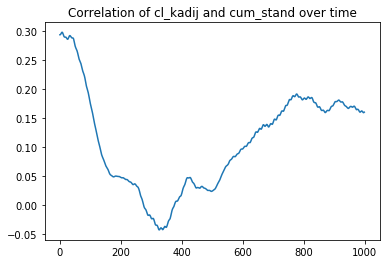

In [7]:
#calculate the correlation between cl_kadij and cum_stand for 0 to 999 hour shift:
correlation_stand = get_correlation(correlation_data, 'cl_kadij', 'cum_stand', 1000)

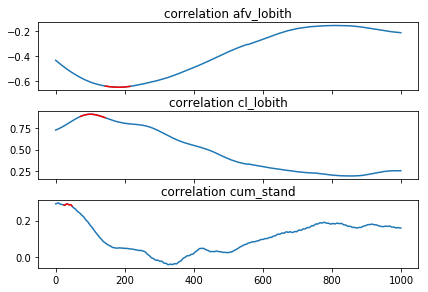

In [8]:
# Conclusion based on correlation, using the following time intervals for the data is "best"
afv_lobith_firstday = 6
afv_lobith_lastday = 9

cl_lobith_firstday = 3
cl_lobith_lastday = 6

stand_firstday = 1 #would ideally be 0 but then we need to use prediction for prediction so let's avoid that for the moment
stand_lastday = 2

# To visualize results, chosen intervals are shown in red
f, axarr = plt.subplots(3, sharex=True)
f.tight_layout()
axarr[0].plot(correlation_afv)
axarr[0].plot(np.arange(afv_lobith_firstday*24, afv_lobith_lastday*24), correlation_afv[afv_lobith_firstday*24:afv_lobith_lastday*24], 'r')
axarr[0].set_title('correlation afv_lobith')

axarr[1].plot(correlation_cl)
axarr[1].plot(np.arange(cl_lobith_firstday*24, cl_lobith_lastday*24), correlation_cl[cl_lobith_firstday*24:cl_lobith_lastday*24], 'r')
axarr[1].set_title('correlation cl_lobith')

axarr[2].plot(correlation_stand)
axarr[2].plot(np.arange(stand_firstday*24, stand_lastday*24), correlation_stand[stand_firstday*24:stand_lastday*24], 'r')
axarr[2].set_title('correlation cum_stand');